In [64]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler #will transform data such that its distribution will have mean value 0 and standard deviation of 1
from sklearn.neighbors import NearestNeighbors#how many nearest neighour we have to consider in term of distance(euclidean)
import pandas as pd
import numpy as np #for matrix calculation
from matplotlib import pyplot as plt #ploting and scatter graph
import math
import random  #generate random no.
from random import choice
from collections import Counter
import time

In [65]:
def random_falsify(n):
    d=pd.read_csv("sensed_value_original.csv")
    no_of_outliers_to_add=len(d)*(n/100)#len(d) for t. no. of rows * by % of outlier to be added gives the actual no. of datapoints in d for no. of outlier to add 
    no_of_outliers_to_add=math.ceil(no_of_outliers_to_add) 
    list=[]
    for i in range(no_of_outliers_to_add):
        while(len(list) != no_of_outliers_to_add):
            r=random.randint(0,len(d)-1)#random.randint will generate a random no. from 0 to len(d)-1 means total no. of rows which is 5030-1=5029
            if r not in list:   list.append(r) #appending the index of outliers in the list 
    list.sort()
    for i in list:
        d.loc[i,"Temperature"]=choice([random.randint(-10,0),random.randint(50,100)])
    d.index.name='index'
    d.to_csv('errored_original_2.csv')
    record = pd.DataFrame((list))
    record.index.name='index'
    record.to_csv('Index_of_errors.csv')

In [66]:
def avg(list):            #function for finding average of the list
    sum=0
    for i in range(len(list)):
        sum=list[i]+sum
    return sum/len(list)

In [67]:
def TPR(outliers_list):               #TPR=no. of outlier detected by actual outlier
    list=[]
    list=outliers_list.index          #storing index of outliers from outlier_df dataframe into list(Outliers which is detected by our program(predicted))        
    df=pd.read_csv('Index_of_errors.csv')  
    l=[]                                   
    l=df['0'].tolist()               #l contains the index of actual outliers which was added in program from Index_of_outliers.csv and copied into list l         
    FN=len(set(l)-set(list))         #FN, which was outliers but not detected as outliers
    TP=len(set(list)&set(l))         #TP is one which correctly predict the outlier
    return (TP/(TP+FN))       

In [68]:
def FPR(outliers_list):
    list=[]
    list=outliers_list.index
    df=pd.read_csv('Index_of_errors.csv')
    l=[]
    l=df['0'].tolist()
    FN=len(set(l)-set(list))
    TP=len(set(list)&set(l))
    return (FN/(TP+FN)) 

In [69]:
def Accuracy(outliers_list):
    list=[]
    list=outliers_list.index
    df=pd.read_csv('Index_of_errors.csv')
    l=[]
    l=df['0'].tolist()
    y=pd.read_csv('errored_original_2.csv')
    t=[]
    t=y['index'].tolist()
    TP=len(set(list)&set(l))
    FP=len(set(list)-set(l))                               #FP means falsely detected as outlier,means which is not an outlier but detected as outlier.
    FN=len(set(l)-set(list))                                       
    TN=len((set(t)-set(l))-(set(list)-set(l)))              #TN, which are not outliers(good data) but actually detect as non_outlier(good data)
    return (TP+TN)/(TP+TN+FP+FN)*100

In [70]:
def sum_of_param(outliers_list):
    list=[]
    list=outliers_list.index
    df=pd.read_csv('Index_of_errors.csv')
    l=[]
    l=df['0'].tolist()
    y=pd.read_csv('errored_original_2.csv')
    t=[]
    t=y['index'].tolist()
    TP=len(set(list)&set(l))
    FP=len(set(list)-set(l))                               
    FN=len(set(l)-set(list))                                       
    TN=len((set(t)-set(l))-(set(list)-set(l)))              
    return (TP+TN+FP+FN)

In [71]:
def Precision(outliers_list):
    list=[]
    list=outliers_list.index
    df=pd.read_csv('Index_of_errors.csv')
    l=[]
    l=df['0'].tolist()
    TP=len(set(list)&set(l))
    FP=len(set(list)-set(l))
    try:
        return(TP/(TP+FP))
    except: 
        return(-1)

In [72]:
def Recall(outliers_list):
    list=[]
    list=outliers_list.index
    df=pd.read_csv('Index_of_errors.csv')
    l=[]
    l=df['0'].tolist()
    FN=len(set(l)-set(list))
    TP=len(set(list)&set(l))
    try:
        return (TP/(TP+FN))
    except: 
        return(-1)

In [73]:
def dbscanalgo(data,ms,ns):
    accuracy_list=[]
    precision_list=[]
    recall_list=[]
    tpr_list=[]
    fpr_list=[]
    dbscan_data=data
    df=pd.read_csv('Index_of_errors.csv')
    l=[]
    l=df['0'].tolist() #list l contains column '0' of Index_of_errors.csv 
    print(f'\nTotal number of falsified outlier added ={len(l)}')
    def makemodels(ns,ms,dbscan_data):
        dbscan_data=StandardScaler().fit_transform(dbscan_data) #fit and transform the data(dbscan_data) and standardscalar for transform data such that its                                                                          #distribution will have mean value 0 and standard deviation of 1 for scaling 
        nbrs=NearestNeighbors(n_neighbors=ns).fit(dbscan_data) #giving ns value to n_neighbour for cal. the avg. distance between each point in the dataset
        distances,indices=nbrs.kneighbors(dbscan_data)
        distanceDec=sorted(distances[:,ns-1],reverse=True)     #and then sort the distance value
        model=DBSCAN(eps=distances.mean(),min_samples=ms,metric='euclidean').fit(dbscan_data)
        print(f'ns={ns} , eps={distances.mean()} , min_samples={ms}')
        outliers_df=data[model.labels_==-1]   #outliers_df contains the dataframe of outliers as the model which are labelled as -1 as outliers
        clusters=Counter(model.labels_)       #model.labels_ are the no. of clusters formed from the data present in model and are labelled 
        print(f'Number of clusters={(len(clusters)-1)}')    #total no. of clusters formed as by ignoring(-) the -1 labelled(noise data)       
        print(f'Number of outliers detected={(len(outliers_df))}')   #total no. of outlier contains in outlier_df  
        print('TPR =',TPR(outliers_df))
        print('FPR =',FPR(outliers_df))
        print('Precison =',Precision(outliers_df))
        print('Recall =',Recall(outliers_df))
        print('Accuracy =',Accuracy(outliers_df)) 
        print(f'TP+TN+FP+FN =', sum_of_param(outliers_df))
        print('\n')
        tpr_list.append(TPR(outliers_df))        #appending TPR values in tpr_list
        fpr_list.append(FPR(outliers_df))        #appending FPR values in fpr_list
        accuracy_list.append(Accuracy(outliers_df)) #appending Accuracy values in accuracy_list
        if Precision(outliers_df)!=-1:
            precision_list.append(Precision(outliers_df))
        if Recall(outliers_df)!=-1:
            recall_list.append(Recall(outliers_df))
    i=0
    while i<3:
        makemodels(ns,ms,dbscan_data) 
        i+=1 
    return avg(accuracy_list),avg(precision_list),avg(recall_list),avg(fpr_list),avg(tpr_list)
start=time.time()  
avg_accuracy=[[0.0 for i in range(5)] for j in range(7)]         #Initialise the matrices by 0.0 
avg_precision=[[0.0 for i in range(5)] for j in range(7)]
avg_recall=[[0.0 for i in range(5)] for j in range(7)]
avg_tpr=[[0.0 for i in range(5)] for j in range(7)]
avg_fpr=[[0.0 for i in range(5)] for j in range(7)]
percent_error=[]
i=0
j=0
while(i<7):
    j+=2
    print(f'\n\nITERATION={i+1}\nPERCENTAGE OF OUTLIERS WHICH IS FALSIFIED={j}%\n')
    epsparams=np.array([[3,120],[5,160],[7,200],[9,320],[11,400]])
    k=0
    percent_error.append(j)
    while(k<5):
        random_falsify(j)
        data = pd.read_csv('errored_original_2.csv')
        accuracy,precision,recall,fpr,tpr=dbscanalgo(data,epsparams[k][0],epsparams[k][1]) #returning avg(accuracy_list),avg(precision_list),avg(recall_list),avg                                                                                                (fpr_list),avg(tpr_list) to accuracy,precision,recall,fpr,tpr respt.     
        avg_accuracy[i][k]=accuracy   #assigning accuracy to matrix avg_accuracy
        avg_precision[i][k]=precision
        avg_recall[i][k]=recall
        avg_fpr[i][k]=fpr
        avg_tpr[i][k]=tpr
        k+=1
    i+=1
avg_accuracy=np.array(avg_accuracy)#converting tuple to np array
avg_precision=np.array(avg_precision)#converting tuple to np array
avg_recall=np.array(avg_recall)#converting tuple to np array
avg_tpr=np.array(avg_tpr)
avg_fpr=np.array(avg_fpr)
time.sleep(1)
end=time.time()
print(f'Runtime for executing the program: {end - start} seconds')



ITERATION=1
PERCENTAGE OF OUTLIERS WHICH IS FALSIFIED=2%


Total number of falsified outlier added =101
ns=120 , eps=0.9967114118642836 , min_samples=3
Number of clusters=9
Number of outliers detected=99
TPR = 0.8316831683168316
FPR = 0.16831683168316833
Precison = 0.8484848484848485
Recall = 0.8316831683168316
Accuracy = 99.3638170974155
TP+TN+FP+FN = 5030


ns=120 , eps=0.9967114118642836 , min_samples=3
Number of clusters=9
Number of outliers detected=99
TPR = 0.8316831683168316
FPR = 0.16831683168316833
Precison = 0.8484848484848485
Recall = 0.8316831683168316
Accuracy = 99.3638170974155
TP+TN+FP+FN = 5030


ns=120 , eps=0.9967114118642836 , min_samples=3
Number of clusters=9
Number of outliers detected=99
TPR = 0.8316831683168316
FPR = 0.16831683168316833
Precison = 0.8484848484848485
Recall = 0.8316831683168316
Accuracy = 99.3638170974155
TP+TN+FP+FN = 5030



Total number of falsified outlier added =101
ns=160 , eps=1.0884207452993844 , min_samples=5
Number of clusters=1
Numbe

In [74]:
avg_acc_df=pd.DataFrame(avg_accuracy)
avg_acc_df.columns=['m=3','m=5','m=7','m=9','m=11']
avg_acc_df.index=['2%','4%','6%','8%','10%','12%','14%']
print(f'avg_fpr\n{avg_acc_df}')

avg_fpr
           m=3        m=5        m=7        m=9       m=11
2%   99.363817  99.562624  99.542744  99.403579  99.542744
4%   98.011928  98.071571  98.489066  98.230616  98.250497
6%   96.520875  96.481113  97.077535  96.640159  96.401590
8%   94.115308  94.393638  94.612326  94.831014  93.896620
10%  92.743539  93.021869  92.465209  92.087475  91.968191
12%  89.821074  89.741551  90.159046  89.622266  89.642147
14%  87.375746  87.713718  88.071571  87.276342  86.819085


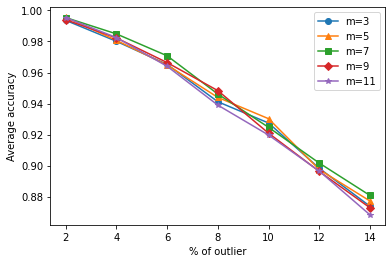

In [75]:
plt.plot(percent_error,avg_accuracy[:,0]/100,marker='o',label="m=3")
plt.plot(percent_error,avg_accuracy[:,1]/100,marker='^',label="m=5")
plt.plot(percent_error,avg_accuracy[:,2]/100,marker='s',label="m=7")
plt.plot(percent_error,avg_accuracy[:,3]/100,marker='D',label="m=9")
plt.plot(percent_error,avg_accuracy[:,4]/100,marker='*',label="m=11")
plt.xlabel("% of outlier")
plt.ylabel("Average accuracy")    #we can see that when % of outliers increases the accuracy drops drastically
plt.legend()
plt.show()

In [76]:
avg_prec_df=pd.DataFrame(avg_precision)
avg_prec_df.columns=['m=3','m=5','m=7','m=9','m=11']
avg_prec_df.index=['2%','4%','6%','8%','10%','12%','14%']
print(f'avg_precision\n{avg_prec_df}')

avg_precision
          m=3       m=5       m=7       m=9     m=11
2%   0.848485  0.862385  0.854545  0.961039  0.97561
4%   0.892308  0.883212  0.909091  0.966942  1.00000
6%   0.909677  0.883436  0.928177  0.992593  0.98400
8%   0.914729  0.885350  0.945946  0.993103  1.00000
10%  0.920732  0.904255  0.936620  1.000000  1.00000
12%  0.903509  0.838462  0.909774  1.000000  1.00000
14%  0.888889  0.865546  0.926829  0.985075  1.00000


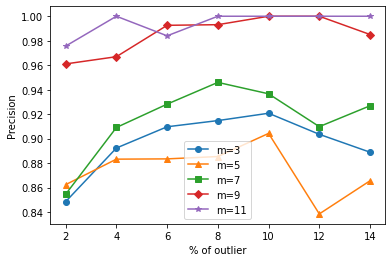

In [77]:
plt.plot(percent_error,avg_precision[:,0],marker='o',label="m=3")
plt.plot(percent_error,avg_precision[:,1],marker='^',label="m=5")
plt.plot(percent_error,avg_precision[:,2],marker='s',label="m=7")
plt.plot(percent_error,avg_precision[:,3],marker='D',label="m=9")
plt.plot(percent_error,avg_precision[:,4],marker='*',label="m=11")
plt.xlabel("% of outlier") 
plt.ylabel("Precision")
plt.legend()
plt.show()

In [78]:
avg_recal_df=pd.DataFrame(avg_recall)
avg_recal_df.columns=['m=3','m=5','m=7','m=9','m=11']
avg_recal_df.index=['2%','4%','6%','8%','10%','12%','14%']
print(f'avg_recall\n{avg_recal_df}')

avg_recall
          m=3       m=5       m=7       m=9      m=11
2%   0.831683  0.930693  0.930693  0.732673  0.792079
4%   0.574257  0.599010  0.693069  0.579208  0.564356
6%   0.466887  0.476821  0.556291  0.443709  0.407285
8%   0.292804  0.344913  0.347395  0.357320  0.238213
10%  0.300199  0.337972  0.264414  0.208748  0.196819
12%  0.170530  0.180464  0.200331  0.135762  0.137417
14%  0.113475  0.146099  0.161702  0.093617  0.059574


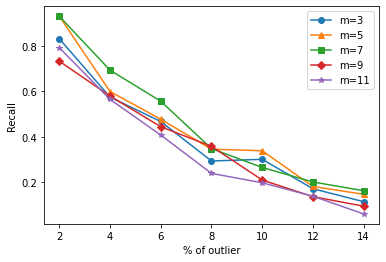

In [79]:
plt.plot(percent_error,avg_recall[:,0],marker='o',label="m=3")
plt.plot(percent_error,avg_recall[:,1],marker='^',label="m=5")
plt.plot(percent_error,avg_recall[:,2],marker='s',label="m=7")
plt.plot(percent_error,avg_recall[:,3],marker='D',label="m=9")
plt.plot(percent_error,avg_recall[:,4],marker='*',label="m=11")
plt.xlabel("% of outlier")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [80]:
avg_fpr_df=pd.DataFrame(avg_fpr)
avg_fpr_df.columns=['m=3','m=5','m=7','m=9','m=11']
avg_fpr_df.index=['2%','4%','6%','8%','10%','12%','14%']
print(f'avg_fpr\n{avg_fpr_df}')
avg_tpr_df=pd.DataFrame(avg_tpr)
avg_tpr_df.columns=['m=3','m=5','m=7','m=9','m=11']
avg_tpr_df.index=['2%','4%','6%','8%','10%','12%','14%']
print(f'\navg_tpr\n{avg_tpr_df}')

avg_fpr
          m=3       m=5       m=7       m=9      m=11
2%   0.168317  0.069307  0.069307  0.267327  0.207921
4%   0.425743  0.400990  0.306931  0.420792  0.435644
6%   0.533113  0.523179  0.443709  0.556291  0.592715
8%   0.707196  0.655087  0.652605  0.642680  0.761787
10%  0.699801  0.662028  0.735586  0.791252  0.803181
12%  0.829470  0.819536  0.799669  0.864238  0.862583
14%  0.886525  0.853901  0.838298  0.906383  0.940426

avg_tpr
          m=3       m=5       m=7       m=9      m=11
2%   0.831683  0.930693  0.930693  0.732673  0.792079
4%   0.574257  0.599010  0.693069  0.579208  0.564356
6%   0.466887  0.476821  0.556291  0.443709  0.407285
8%   0.292804  0.344913  0.347395  0.357320  0.238213
10%  0.300199  0.337972  0.264414  0.208748  0.196819
12%  0.170530  0.180464  0.200331  0.135762  0.137417
14%  0.113475  0.146099  0.161702  0.093617  0.059574


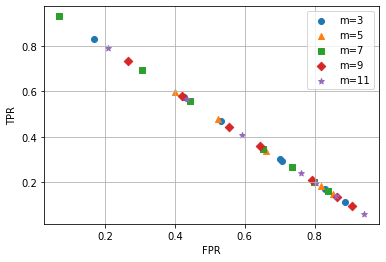

In [81]:
plt.scatter(avg_fpr[:,0],avg_tpr[:,0],marker='o',label="m=3")
plt.scatter(avg_fpr[:,1],avg_tpr[:,1],marker='^',label="m=5")
plt.scatter(avg_fpr[:,2],avg_tpr[:,2],marker='s',label="m=7")
plt.scatter(avg_fpr[:,3],avg_tpr[:,3],marker='D',label="m=9")
plt.scatter(avg_fpr[:,4],avg_tpr[:,4],marker='*',label="m=11")
plt.xlabel("FPR") #by this roc we can determine for much m and ns value it showing the good TPR and less FPR
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()
